## 2.0 - EDA uppvärmning

This represents all the  exercises from 2.0a to 2.0g

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px


In [32]:
cardio_dataset = pd.read_csv("../data/cardio_train.csv", delimiter=";")
cardio_dataset


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


### Features:

- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm) |
- Weight | Objective Feature | weight | float (kg) |
- Gender | Objective Feature | gender | categorical code |
- Systolic blood pressure | Examination Feature | ap_hi | int |
- Diastolic blood pressure | Examination Feature | ap_lo | int |
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
- Smoking | Subjective Feature | smoke | binary |
- Alcohol intake | Subjective Feature | alco | binary |
- Physical activity | Subjective Feature | active | binary |
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


In [33]:
# These heights weights are obviously questionable. But in this exploration they will be kept.
cardio_dataset['height'].max(), cardio_dataset['height'].min()

(250, 55)

In [34]:
cardio_dataset['weight'].max(), cardio_dataset['weight'].min()

(200.0, 10.0)

In [35]:
cardio_dataset.isnull().sum()


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [36]:
cardio_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [37]:
cardio_dataset.describe()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### 2.a Number of positive and negative cases for heart disease


In [38]:
count_positive = (cardio_dataset["cardio"] >= 1).sum()
count_positive


34979

In [39]:
count_negative = (cardio_dataset["cardio"] == 0).sum()
count_negative


35021

In [40]:
count_negative + count_positive


70000

### 2. Share of Normal, Above normal, Way over normal cholesterol levels


In [41]:
normal, above_normal, way_above = 0, 0, 0

for value in cardio_dataset["cholesterol"]:
    if value == 1:
        normal += 1
    if value == 2:
        above_normal += 1
    if value == 3:
        way_above += 1

print(
    f"Normal cholesterol total patients = {normal} \nAbove normal = {above_normal} \nAnd way over = {way_above} \nWith a combined total of = {normal + above_normal + way_above}"
)


Normal cholesterol total patients = 52385 
Above normal = 9549 
And way over = 8066 
With a combined total of = 70000


In [42]:
# Alternatively using pandas groupby function
cholesterol = cardio_dataset.groupby("cholesterol").agg({"id": "count"}).reset_index()
cholesterol.head()


,cholesterol,id
0,1,52385
1,2,9549
2,3,8066


Text(0, 0.5, 'Count')

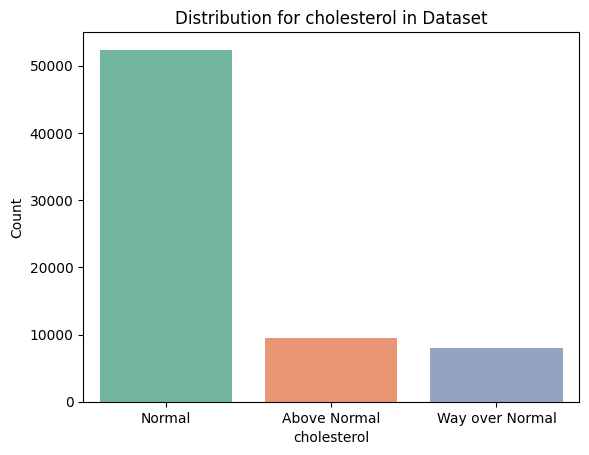

In [43]:
fig = plt.subplot(111)

sns.barplot(data=cholesterol, x="cholesterol", y="id", palette="Set2")
fig.set_title("Distribution for cholesterol in Dataset")
fig.set_xticklabels(["Normal", "Above Normal", "Way over Normal"])
fig.set_ylabel("Count")


## 2.c) Age Distribution in the dataset


In [44]:
age_distribution = cardio_dataset.groupby("age").agg({"id": "count"})
age_distribution


,id
age,
10798,1
10859,1
10878,1
10964,1
14275,1
...,...
23687,1
23690,1
23692,1


In [45]:
# Round down beacause 20.9 years old person is always considered 20 years and are only considered 30 upon turning 30.

cardio_dataset["age_years"] = (cardio_dataset["age"] / (365.25)).round().astype(int)
cardio_dataset.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48


In [46]:
cardio_dataset["age_years"].describe()


count    70000.000000
mean        53.303157
std          6.760171
min         30.000000
25%         48.000000
50%         54.000000
75%         58.000000
max         65.000000
Name: age_years, dtype: float64

- From the above the we can see that the youngest participant in this study is 30 and the oldest is 65, a mean of 53 and a standard deviation of 6 years.


In [47]:
cardio_dataset["age_years"].value_counts


<bound method IndexOpsMixin.value_counts of 0        50
1        55
2        52
3        48
4        48
         ..
69995    53
69996    62
69997    52
69998    61
69999    56
Name: age_years, Length: 70000, dtype: int64>

Text(0.5, 1.0, 'Age distribution of all participants')

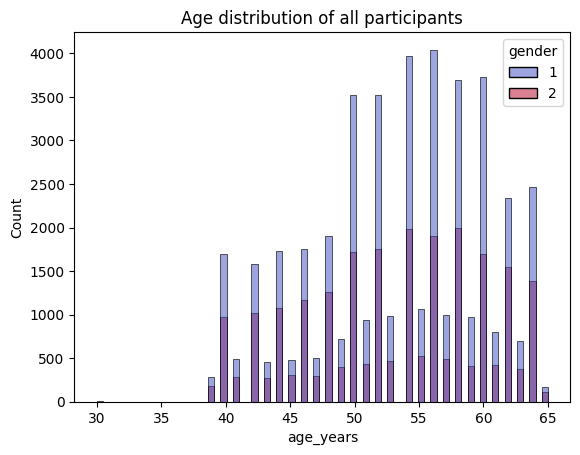

In [48]:
fig = plt.subplot(111)

sns.histplot(data=cardio_dataset, x="age_years", hue="gender", palette="coolwarm")

fig.set_title("Age distribution of all participants")


## 2.d) Smoking distribution


In [49]:
smokers = cardio_dataset.groupby("smoke").agg({"id": "count"}).reset_index()
smokers["id"].sum()


70000

In [50]:
smokers


,smoke,id
0,0,63831
1,1,6169


[Text(0, 0, 'Non-smoker'), Text(1, 0, 'Smoker')]

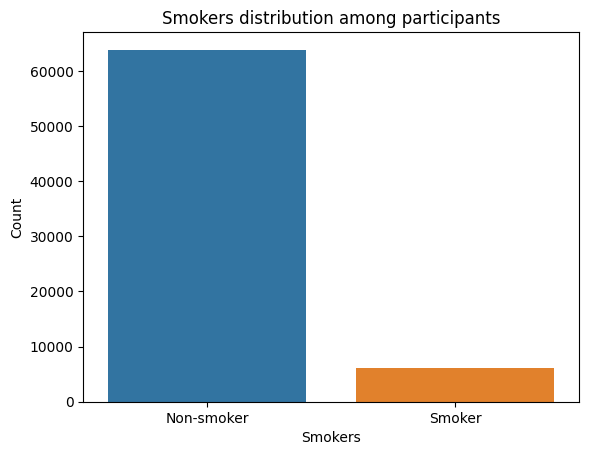

In [51]:
fig = plt.subplot(111)

sns.barplot(smokers, x="smoke", y="id")
fig.set_title("Smokers distribution among participants")
fig.set_ylabel("Count")
fig.set_xlabel("Smokers")
fig.set_xticklabels(["Non-smoker", "Smoker"])


## 2.e) Weight distribution in dataset


In [52]:
weight_distribution = (
    cardio_dataset.groupby("weight").agg({"id": "count"}).reset_index()
)
weight_distribution


,weight,id
0,10.0,1
1,11.0,1
2,21.0,1
3,22.0,1
4,23.0,1
...,...,...
282,178.0,3
283,180.0,4
284,181.0,1
285,183.0,1


In [53]:
weight_distribution.describe()


,weight,id
count,287.000000,287.000000
mean,87.448780,243.902439
std,38.277355,604.110041
min,10.000000,1.000000
25%,61.100000,1.000000
50%,77.000000,2.000000
75%,109.600000,64.000000
max,200.000000,3850.000000


In [54]:
cardio_dataset.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48


In [55]:
bins = [0, 30, 50, 70, 100, 120, 150]  # weight ranges
labels = ["<30", "30-49", "50-69", "70-99", "100-119", "150+"]  # weight range labels
cardio_dataset["weight_range"] = pd.cut(
    cardio_dataset["weight"], bins=bins, labels=labels
)

cardio_dataset.sort_values(by="weight_range", ascending=False)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,weight_range
43048,61494,21866,1,163,123.0,130,80,3,3,0,0,1,1,60,150+
26596,37993,19815,2,163,130.0,120,80,3,3,1,0,1,0,54,150+
3591,5086,21310,1,161,140.0,120,80,3,1,0,0,0,1,58,150+
30777,43990,17334,2,184,121.0,120,80,2,1,0,0,1,0,47,150+
36019,51427,20579,2,183,128.0,140,90,2,1,1,0,1,1,56,150+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63687,90930,23483,1,154,155.0,170,80,2,1,0,0,1,0,64,NaN
63937,91284,21115,1,164,164.0,120,80,1,1,0,0,1,0,58,NaN
64661,92301,21705,1,169,172.0,120,70,2,1,0,0,1,0,59,NaN
65005,92778,21076,1,176,154.0,140,80,1,1,0,0,1,1,58,NaN


In [56]:
fig = px.histogram(
    weight_distribution, x="weight", title="Weight Distribution in Dataset"
)
fig.update_xaxes(title_text="Weight distribution")
fig.show()


## 2.f) Height distribution in the dataset


In [57]:
height_distribution = (
    cardio_dataset.groupby("height").agg({"id": "count"}).reset_index()
)
height_distribution


,height,id
0,55,1
1,57,1
2,59,1
3,60,1
4,64,1
...,...,...
104,197,4
105,198,14
106,200,1
107,207,1


<Axes: xlabel='height', ylabel='Count'>

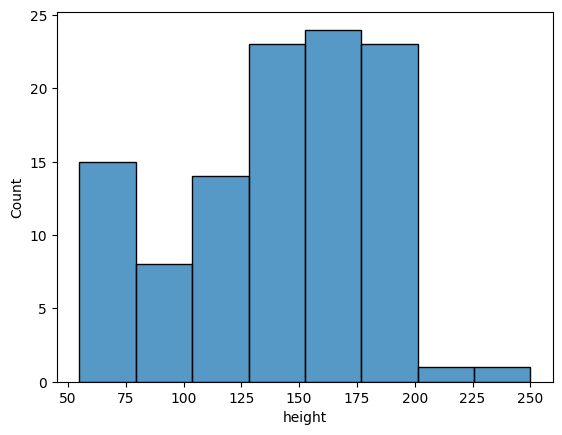

In [66]:
sns.histplot(height_distribution, x='height')

In [58]:
fig = px.histogram(
    height_distribution, x="height", title="Height Distribution in Dataset"
)
fig.update_xaxes(title_text="Height distribution")
fig.show()


## 2.g) Men vs Women with a heart disease


In [59]:
cardio_dataset


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,weight_range
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,50-69
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,70-99
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,50-69
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,70-99
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48,50-69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,53,70-99
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,62,150+
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,100-119
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,70-99


In [60]:
presence_of_cardio_disease = (
    cardio_dataset.groupby(["cardio", "gender"]).agg({"id": "count"}).reset_index()
)
presence_of_cardio_disease


,cardio,gender,id
0,0,1,22914
1,0,2,12107
2,1,1,22616
3,1,2,12363


In [61]:
alternative_df = (
    cardio_dataset.groupby(["gender", "cardio", "id"]).size().reset_index(name="count")
)
alternative_df = (
    alternative_df.groupby(["gender", "cardio"]).agg({"id": "count"}).reset_index()
)
alternative_df


,gender,cardio,id
0,1,0,22914
1,1,1,22616
2,2,0,12107
3,2,1,12363


In [62]:
heart_desease_by_gender = cardio_dataset.groupby("gender").agg({"cardio": "count"})
heart_desease_by_gender


,cardio
gender,
1,45530
2,24470


In [63]:
women = cardio_dataset[cardio_dataset["gender"] == 1]
women_cardio = women.groupby("cardio").agg({"id": "count"}).reset_index()
women_cardio


,cardio,id
0,0,22914
1,1,22616


In [64]:
men = cardio_dataset[cardio_dataset["gender"] == 2]
men_cardio = men.groupby("cardio").agg({"id": "count"}).reset_index()
men_cardio


,cardio,id
0,0,12107
1,1,12363


In [65]:
import plotly_express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


fig = make_subplots(rows=1, cols=1)
trace1 = px.bar(men_cardio, x="cardio", y="id")
trace2 = px.bar(women_cardio, x="cardio", y="id")


trace_list = [trace1, trace2]
y_col = ["Men", "Women"]
text = ["Women: " + str(val) for val in trace2.data[0]["y"]]

for i, (item, title) in enumerate(zip(trace_list, y_col)):
    fig.add_trace(
        go.Bar(
            name=title,
            x=["No Cardiovascular Disease", "Cardiovascular Disease"],
            y=item.data[0]["y"],
            showlegend=True,
            text=[f"{title}: " + str(val) for val in item.data[0]["y"]],
        )
    )


fig["layout"].update(
    height=600,
    width=1200,
    title="Gender distribution and existence of cardiovascular disease",
    plot_bgcolor="rgba(255,255,255,0.1)",
    paper_bgcolor="rgba(255,255,255,0.9)",
    showlegend=True,
)
fig.update_yaxes(
    tickmode="auto",
    showgrid=False,
    linecolor="#000",
    showline=True,
    spikecolor="#000000",
    title="Count",
)
fig.update_xaxes(
    tickmode="auto",
    showgrid=False,
    zeroline=True,
    title="Existence of Cardiovascular Disease",
    linecolor="#000",
    showline=True,
    spikecolor="#000000",
    showticklabels=True,
)


fig.show()
